In [1]:
from pathlib import Path

import geopandas as gpd
import shapely.geometry as sgeom

In [2]:
SAVE_KWDS = {"bbox_inches": "tight", "dpi": 300, "facecolor": "w"}

In [3]:
root = Path("..", "data")
out_path = Path(root, "outputs")
img_path = Path(root, "figures")

In [4]:
east = gpd.read_file(Path(out_path, "east_coast.gpkg")).to_crs("esri:102008")
east_buff = east.buffer(50e3).to_crs(epsg=4326).unary_union

us = gpd.read_file(
    "https://www2.census.gov/geo/tiger/TIGER2020/STATE/tl_2020_us_state.zip"
)
us = us.to_crs("esri:102008")

east_geo = gpd.clip(us, sgeom.box(*east.convex_hull[0].bounds))
east_geo.to_file(Path(out_path, "east_geo.gpkg"))

In [5]:
east_res = gpd.read_feather(Path(out_path, "east_res.feather"))

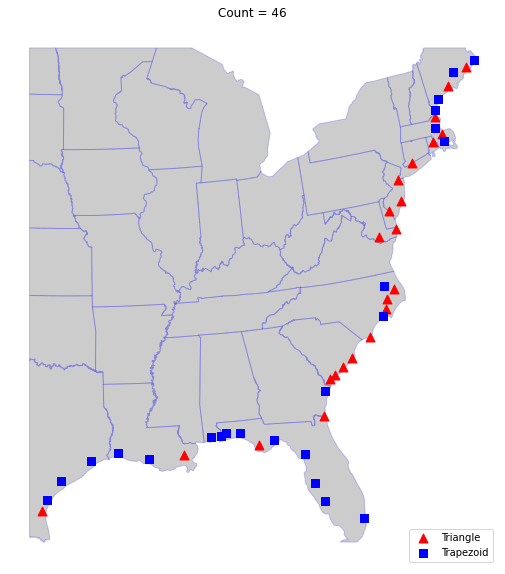

In [6]:
er = east_res.to_crs("esri:102008")
tri = er[er.Shape == "triangle"]
trp = er[er.Shape == "trapezoid"]
ax = east_geo.plot(facecolor="k", edgecolor="b", alpha=0.2, figsize=(10, 10))
tri.plot(ax=ax, markersize=80, marker="^", color="red")
trp.plot(
    ax=ax,
    markersize=80,
    marker="s",
    color="blue",
)
ax.legend(["Triangle", "Trapezoid"], loc="lower right")
ax.set_title(f"Count = {len(east_res)}")
ax.axis("off")
ax.figure.savefig(Path(img_path, f"east_res_distribution.png"), **SAVE_KWDS)